## LOADING IRIS DATA

In [1]:
from sklearn import datasets

In [2]:
import numpy as np

In [3]:
iris=datasets.load_iris()

In [4]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [5]:
X=iris.data[:,[2,3]]

In [6]:
y=iris.target

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
np.unique(y)

array([0, 1, 2])

## SPLITTING DATA

In [9]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
len(y)

150

In [11]:
len(X_train)

105

In [12]:
type(X)

numpy.ndarray

In [13]:
len(y_test)

45

## STANDARDIZING THE FEATURES

In [14]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler().fit(X_train)

X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [15]:
X_test_std[1:5,]

array([[ 0.09545238, -0.29145882],
       [-1.35224199, -1.32013702],
       [ 1.37610509,  0.73721938],
       [-1.29656144, -1.32013702]])

## PERCEPTRON

In [16]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(n_iter=40,eta0=0.1,random_state=0)

ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [17]:
#training score/accuracy
ppn.score(X_train_std,y_train)

0.90476190476190477

In [18]:
ppn.fit.im_self

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [19]:
y_pred=ppn.predict(X_test_std)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.91111111111111109

In [21]:
#testing score/accuracy
ppn.score(X_test_std,y_test)

0.91111111111111109

In [22]:
print('The accuracy of model is {0:.2f}'.format(accuracy_score(y_test,y_pred)))

The accuracy of model is 0.91


In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## LOGISTIC REGRESSION

0.977777777778


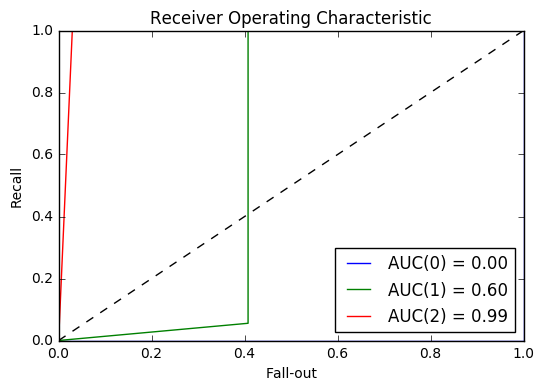

In [24]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1000.0,random_state=0)

lr.fit(X_train_std,y_train)

#y_pred=lr.predict_proba(X_test_std)   --this gives the probabilities
y_pred=lr.predict(X_test_std)

print(accuracy_score(y_test,y_pred))


from sklearn.metrics import auc,roc_curve

for label in np.arange(3):
    false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred, pos_label=label)
    roc_auc = auc(false_positive_rate, recall)
    plt.plot(false_positive_rate, recall, label='AUC(%d) = %0.2f' % (label, roc_auc))

plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()



In [25]:
#training score
lr.score(X_test_std,y_test)

0.97777777777777775

In [26]:
np.arange(3)

array([0, 1, 2])

In [27]:
false_positive_rate

array([ 0.        ,  0.02941176,  0.52941176,  1.        ])

In [28]:
recall

array([ 0.,  1.,  1.,  1.])

In [29]:
thresholds

array([3, 2, 1, 0])

## REGULARIZATION - CLASSIFICATION

In [30]:
weights, params=[],[]

In [31]:
for c in np.arange(-5,5):
    lr=LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)


In [32]:
weights=np.array(weights)
weights

array([[  6.55979672e-05,   3.27209902e-05],
       [  6.53690140e-04,   3.24948619e-04],
       [  6.31936684e-03,   3.03439293e-03],
       [  4.88199280e-02,   1.62092216e-02],
       [  2.38824476e-01,  -6.64831864e-02],
       [  1.06011115e+00,  -8.41544819e-01],
       [  2.19190886e+00,  -1.98265142e+00],
       [  2.50582212e+00,  -2.30336729e+00],
       [  2.54373335e+00,  -2.34219790e+00],
       [  2.54760621e+00,  -2.34616582e+00]])

In [33]:
lr.score(X_train_std,y_train)

0.96190476190476193

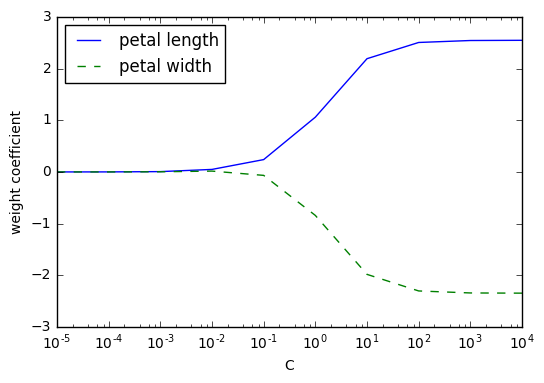

In [34]:
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [35]:
lr.coef_

array([[-9.38725178, -8.62196104],
       [ 2.54760621, -2.34616582],
       [ 9.8260878 ,  6.51345035]])

In [36]:
lr.intercept_

array([-12.237882  ,  -0.89485178,  -9.10527128])

## SUPPORT VECTOR MACHINES CLASSIFICATION

https://chrisalbon.com/machine-learning/svc_parameters_using_rbf_kernel.html

In [37]:
#linear SVM                                                                                                                                 

from sklearn.svm import SVC

svm=SVC(kernel='linear',C=1.0,random_state=0)                                                           

svm.fit(X_train_std, y_train)

y_pred=svm.predict(X_test_std)

accuracy_score(y_test,y_pred)

0.97777777777777775

In [38]:
# non linear SVM (low gamma)

from sklearn.svm import SVC

svm=SVC(kernel='rbf',C=1.0,gamma=0.2,random_state=0)                                                           

svm.fit(X_train_std, y_train)

y_pred=svm.predict(X_test_std)

accuracy_score(y_test,y_pred)



0.97777777777777775

In [39]:
# non linear SVM (high gamma) - leads to overfitting

from sklearn.svm import SVC

svm=SVC(kernel='rbf',C=1.0,gamma=100.0,random_state=0)                                                           

svm.fit(X_train_std, y_train)

y_pred=svm.predict(X_test_std)

accuracy_score(y_test,y_pred)


0.80000000000000004

## DESCISION TREE CLASSIFICATION

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

tree.fit(X_train,y_train)

y_pred=tree.predict(X_test)

accuracy_score(y_test,y_pred)

0.97777777777777775

In [41]:
from sklearn.tree import export_graphviz

export_graphviz(tree,out_file='tree.dot',feature_names=['petal length', 'petel width'])

## RANDOM FOREST CLASSIFICATION

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(criterion='entropy',
                              n_estimators=10,
                              random_state=1,
                              n_jobs=2)

forest.fit(X_train,y_train)

y_pred=forest.predict(X_test)

accuracy_score(y_test,y_pred)


0.9555555555555556

## KNN CLASSIFICATION

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski")

knn.fit(X_train_std,y_train)

y_pred=knn.predict(X_test_std)

accuracy_score(y_test,y_pred)

1.0

## HANDLING CATEGORICAL DATA

In [44]:
import pandas as pd
df = pd.DataFrame([
            ['green', 'M', 10.1, 'class1'], 
            ['red', 'L', 13.5, 'class2'], 
            ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [45]:
#mapping ordinal features

size_mapping={'XL':3,
              'L':2,
              'M':1}

df['size']=df['size'].map(size_mapping)
df

df1=df[:]
df1

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [46]:
#inverse mapping of ordinal features

inv_size_mapping={v:k for k,v in size_mapping.items()}
inv_size_mapping

df['size']=df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [47]:
#encoding class labels

class_mapping={label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping



{'class1': 0, 'class2': 1}

In [48]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [49]:
#one hot encoding

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

X=df1[['color','size','price']].values

label_encoder=LabelEncoder()

X[:,0]=label_encoder.fit_transform(X[:,0])

X


array([[1L, 1L, 10.1],
       [2L, 2L, 13.5],
       [0L, 3L, 15.3]], dtype=object)

In [50]:
#dense numpy array as o/p
ohe=OneHotEncoder(categorical_features=[0])

ohe.fit_transform(X).toarray()


array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [51]:
#dense numpy array as o/p
ohe1=OneHotEncoder(categorical_features=[0],sparse=False)

ohe1.fit_transform(X)


array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [52]:
#sparse numpy array as o/p
ohe.fit_transform(X)

<3x5 sparse matrix of type '<type 'numpy.float64'>'
	with 9 stored elements in COOrdinate format>

In [53]:
pd.get_dummies(df1[['color','size','price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0.0,1.0,0.0
1,2,13.5,0.0,0.0,1.0
2,3,15.3,1.0,0.0,0.0


## FEATURE SELECTION


In [56]:
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine = pd.read_csv('wine.txt', sep=',',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
from sklearn.cross_validation import train_test_split

X,y=df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=10000,
                              random_state=0,
                              n_jobs=-1)

forest.fit(X_train,y_train)

print forest.score(X_train,y_train)

y_pred=forest.predict(X_test)

print accuracy_score(y_test,y_pred)


1.0
0.981481481481


In [59]:
importances=forest.feature_importances_
importances

array([ 0.10658906,  0.02539968,  0.01391619,  0.03203319,  0.02207807,
        0.0607176 ,  0.15094795,  0.01464516,  0.02235112,  0.18248262,
        0.07824279,  0.1319868 ,  0.15860977])

In [60]:
indices=np.argsort(importances)[::-1]

In [61]:
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2], dtype=int64)

In [62]:
importances[indices]

array([ 0.18248262,  0.15860977,  0.15094795,  0.1319868 ,  0.10658906,
        0.07824279,  0.0607176 ,  0.03203319,  0.02539968,  0.02235112,
        0.02207807,  0.01464516,  0.01391619])

In [63]:
labels=df_wine.columns[1:]
labels

Index([u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash', u'Magnesium',
       u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')

In [64]:

    

    
    
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, labels[indices[f]], importances[indices[f]]))
    


1. Color intensity (0.182483)
2. Proline (0.158610)
3. Flavanoids (0.150948)
4. OD280/OD315 of diluted wines (0.131987)
5. Alcohol (0.106589)
6. Hue (0.078243)
7. Total phenols (0.060718)
8. Alcalinity of ash (0.032033)
9. Malic acid (0.025400)
10. Proanthocyanins (0.022351)
11. Magnesium (0.022078)
12. Nonflavanoid phenols (0.014645)
13. Ash (0.013916)


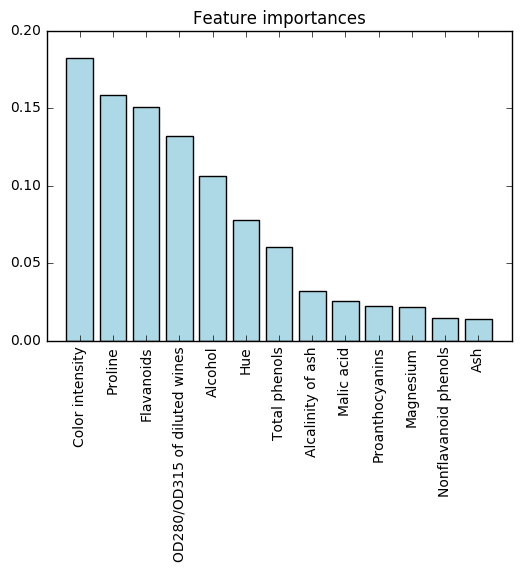

In [65]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="lightblue", align="center")
plt.xticks(range(X_train.shape[1]), labels[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## UNSUPERVISED DIMENSIONALITY REDUCTION VIA PCA

In [66]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()


In [67]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

In [69]:
#PCA with logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca=PCA(n_components=None)
lr=LogisticRegression()

X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.fit_transform(X_test_std)

lr.fit(X_train_pca,y_train)

print lr.score(X_train_pca,y_train)

y_pred=lr.predict(X_test_pca)

print accuracy_score(y_test,y_pred)

0.991935483871
0.907407407407


In [71]:
pca.explained_variance_ratio_

array([ 0.34497227,  0.20972293,  0.11796553,  0.09677852,  0.06836124,
        0.0454349 ,  0.03353372,  0.0192561 ,  0.01804719,  0.01518026,
        0.01243988,  0.0095812 ,  0.00872627])

In [72]:
import seaborn as sns

ax=sns.barplot(x=range(1,len(pca.explained_variance_ratio_)+1),y=pca.explained_variance_ratio_)
ax.set(xlabel='principal components', ylabel='individual explained variance')

ImportError: No module named seaborn

In [73]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.34497227,  0.5546952 ,  0.67266073,  0.76943925,  0.83780049,
        0.88323539,  0.91676911,  0.9360252 ,  0.95407239,  0.96925265,
        0.98169253,  0.99127373,  1.        ])

In [74]:
ax=sns.barplot(x=range(1,len(pca.explained_variance_ratio_)+1),y=np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='principal components', ylabel='cummulative explained variance')

NameError: name 'sns' is not defined

## SUPERVISED DATA COMPRESSION VIA LDA

In [76]:
#LDA with logistic regression

from sklearn.lda import LDA
from sklearn.linear_model import LogisticRegression


lda=LDA(n_components=None,solver='eigen')
lr=LogisticRegression()

X_train_lda=lda.fit_transform(X_train_std,y_train)
X_test_lda=lda.transform(X_test_std)

lr.fit(X_train_lda,y_train)

print lr.score(X_train_lda,y_train)

y_pred=lr.predict(X_test_lda)

print accuracy_score(y_test,y_pred)

1.0
1.0


In [77]:
lda.explained_variance_ratio_

array([  7.38463140e-01,   2.61536860e-01,   2.51383498e-16,
         1.52707099e-16,   1.34293637e-16,   7.03030112e-17,
         6.12147200e-17,   2.83409554e-17,  -4.41026632e-18,
        -3.08149479e-17,  -3.60795242e-17,  -6.87413328e-17,
        -2.57597834e-16])

In [78]:
sum(lda.explained_variance_ratio_)

1.0000000000000002

In [79]:
ax=sns.barplot(x=range(1,len(lda.explained_variance_ratio_)+1),y=lda.explained_variance_ratio_)
ax.set(xlabel='linear discriminants', ylabel='individual discriminability')

NameError: name 'sns' is not defined

In [ ]:
ax=sns.barplot(x=range(1,len(lda.explained_variance_ratio_)+1),y=np.cumsum(lda.explained_variance_ratio_))
ax.set(xlabel='linear discriminants', ylabel='cummulative discriminability')

In [80]:
#LDA for classification

from sklearn.lda import LDA

lda=LDA(n_components=None,solver='svd')

X_train_lda=lda.fit(X_train_std,y_train)

print lda.score(X_train_std,y_train)

y_pred=lda.predict(X_test_std)

print accuracy_score(y_test,y_pred)

1.0
0.981481481481


## USING KERNEL PCA FOR NONLINEAR MAPPINGS

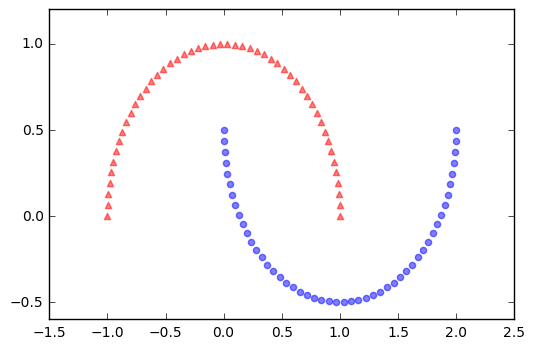

In [81]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,random_state=123)

plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

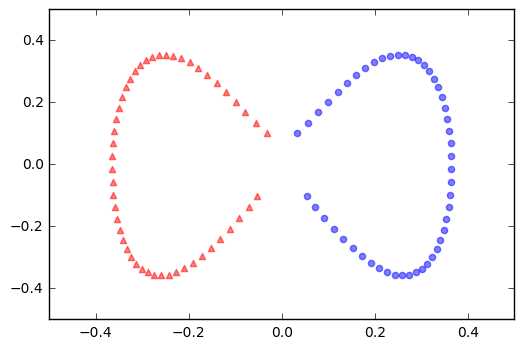

In [82]:
from sklearn.decomposition import KernelPCA

scikit_kpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)
X_skernpca=scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.show()

## LOADING BREAST CANCER WISCONSIN DATASET

In [83]:
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

df = pd.read_csv('wdbc.txt', header=None, sep=',')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values


In [85]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [86]:
le.transform(['M','B'])

array([1, 0], dtype=int64)

In [87]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

## COMBINING TRANSFORMERS AND ESTIMATORS IN A PIPELINE

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [89]:
pipe_lr=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=2)),('clf',LogisticRegression(random_state=1))])

In [90]:
pipe_lr.fit(X_train,y_train)

#training accuracy
print(pipe_lr.score(X_train,y_train))

#testing accuracy
print(pipe_lr.score(X_test,y_test))


0.953846153846
0.947368421053


## K FOLD CROSS VALIDATION

In [111]:
df.groupby([1]).size()

1
B    357
M    212
dtype: int64

In [113]:
np.bincount(y_train)

array([285, 170], dtype=int64)

In [114]:
#stratified K fold CV

from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y_train, n_folds=10, random_state=1)

scores=[]

for k,(train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score=pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print ('Fold: %s, Class dist.: %s, Acc: %.3f' %(k+1, np.bincount(y_train[train]), score))

Fold: 1, Class dist.: [256 153], Acc: 0.891
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956


In [115]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy: 0.950 +/- 0.029


In [117]:
#Alternative and effective way for stratified K fold CV


from sklearn.cross_validation import cross_val_score


scores = cross_val_score(pipe_lr, X=X_train, y=y_train, cv=10, n_jobs=-1)

In [118]:
scores

array([ 0.89130435,  0.97826087,  0.97826087,  0.91304348,  0.93478261,
        0.97777778,  0.93333333,  0.95555556,  0.97777778,  0.95555556])

In [119]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy: 0.950 +/- 0.029


## DIAGNOSING BIAS AND VARIANCE PROBLEMS WITH LEARNING CURVES

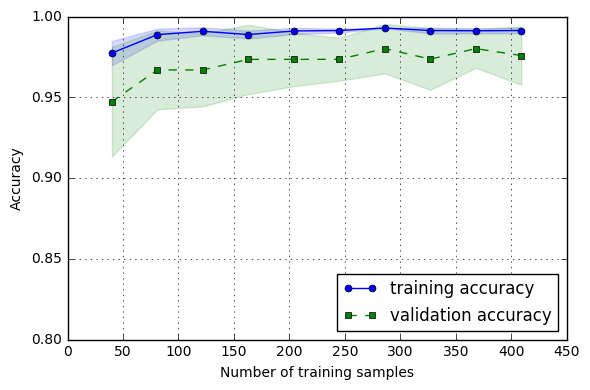

In [120]:
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

In [124]:
train_sizes

array([ 40,  81, 122, 163, 204, 245, 286, 327, 368, 409])

In [126]:
y_train.size

455

In [132]:
print train_scores

[[ 1.          0.975       0.975       0.975       0.975       0.975       0.975
   0.975       0.975       0.975     ]
 [ 1.          0.98765432  0.98765432  0.98765432  0.98765432  0.98765432
   0.98765432  0.98765432  0.98765432  0.98765432]
 [ 0.99180328  0.98360656  0.99180328  0.99180328  0.99180328  0.99180328
   0.99180328  0.99180328  0.99180328  0.99180328]
 [ 0.99386503  0.98773006  0.98773006  0.99386503  0.98773006  0.98773006
   0.98773006  0.98773006  0.98773006  0.98773006]
 [ 0.99509804  0.99019608  0.99019608  0.99509804  0.99019608  0.99019608
   0.99019608  0.99019608  0.99019608  0.99019608]
 [ 0.99183673  0.9877551   0.99183673  0.99183673  0.99183673  0.99183673
   0.99183673  0.99183673  0.99183673  0.99183673]
 [ 0.99300699  0.99300699  0.99300699  0.99300699  0.99300699  0.99300699
   0.99300699  0.99300699  0.99300699  0.99300699]
 [ 0.99082569  0.98776758  0.99082569  0.99082569  0.99082569  0.99082569
   0.99388379  0.99082569  0.99388379  0.99388379]
 [ 0.

In [128]:
np.mean(train_scores, axis=1)

array([ 0.9775    ,  0.98888889,  0.99098361,  0.98895706,  0.99117647,
        0.99142857,  0.99300699,  0.99143731,  0.99130435,  0.99144254])

In [129]:
a=np.array([[10,20],[40,80]])

In [131]:
print a

[[10 20]
 [40 80]]


In [134]:
np.mean(a,axis=0)

array([ 25.,  50.])

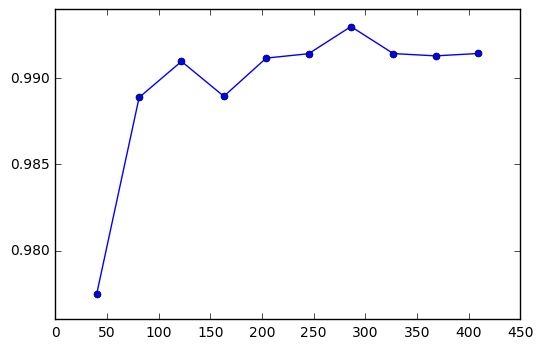

In [135]:
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')


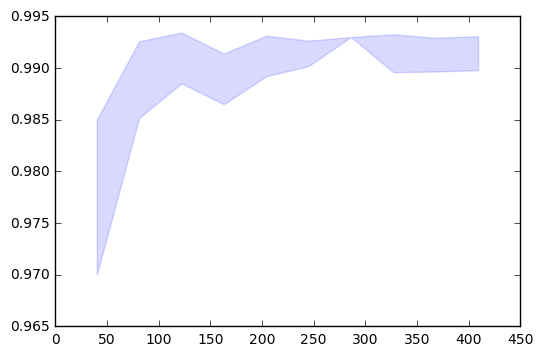

In [136]:
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')